In [1]:
!pip install pandapower

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 8.3 MB/s eta 0:00:00
  Created wheel for pandapower: filename=pandapower-2.13.1-py3-none-any.whl size=10803674 sha256=9c2319c67dcb1d59678da3e024ad4ba9de6c3a51e08f94447756b2705d902325
  Stored in directory: /root/.cache/pip/wheels/6b/58/fb/c5c16044f0046e905e2fe55de3af6c0a43bfcc3219ed5d3af8
Successfully built pandapower


## Step 1: Implementing IEEE 30-bus Network and power flow simulation.

In [2]:
import pandapower.networks as pn
import pandapower as pp
import numpy as np
import pandas as pd
import math

net = pn.case_ieee30()
pp.runpp(net) #  get initial values

Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



# Step 2: Extract mentioned Bus features
1. bus voltage magnitude,
2. bus voltage phase angle,
3. bus real power, and
4. bus reactive power

Refer in section III of paper


#### Realistic data sets that contains bus and branch parameters created from IEEE-20 bus network
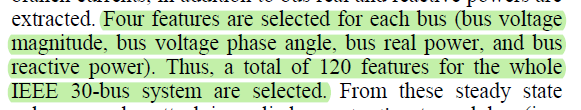


In [3]:
bus_voltages = net.res_bus.vm_pu
bus_voltage_angle = net.res_bus.va_degree
bus_real_power= net.res_bus.p_mw
bus_reactive_power = net.res_bus.q_mvar


## Extra Features
#### Refer Section III: B) Attack Generation Engine
The physical
features (KCL for each bus) are added (additional 30 features
are added to the original 120 features which results in 150 total
features).

In [4]:
bus_currents = net.res_line.i_ka[:len(bus_voltages)]
line_flows = (net.res_line.pl_mw + 1j * net.res_line.ql_mvar)[:len(bus_voltages)]
net_currents = np.sum(net.res_line.i_from_ka) - np.sum(net.res_line.i_to_ka)
kcl_violation = np.abs(net_currents)


In [5]:
df1 = []

for bus_index in range(30):
  net_currents = np.sum(net.res_line.i_from_ka[bus_index]) - np.sum(net.res_line.i_to_ka[bus_index])
  kcl = np.abs(net_currents)
  df1.append([bus_voltages[bus_index],bus_currents[bus_index],bus_real_power[bus_index],bus_reactive_power[bus_index],bus_voltage_angle[bus_index],kcl])
df1

[[1.06,
  0.7223432111579534,
  -260.9569478352263,
  20.41788339794333,
  0.0,
  0.0041459556523062435],
 [1.0449999999999997,
  0.3622848129679357,
  -18.3,
  -43.369461927260176,
  -5.3782430139581745,
  0.00018454280735402673],
 [1.0211776841654083,
  0.1857595532203536,
  2.3999999999999986,
  1.1999999999999993,
  -7.528659582591418,
  0.001972161380449977],
 [1.0123004302026501,
  0.35221392777691657,
  7.599999999999998,
  1.5999999999999996,
  -9.279432396832288,
  0.00021207377121695847],
 [1.01,
  0.3449212827458557,
  94.20000000000002,
  -16.658790748931892,
  -14.148767106272572,
  0.00026807094569519796],
 [1.0106257492544857,
  0.2529081551101663,
  0.0,
  0.0,
  -11.055023313931333,
  0.00012143407139397766],
 [1.0025970839077802,
  0.31913540603215657,
  22.80000000000001,
  10.899999999999999,
  -12.852318766795426,
  0.0008941572178397528],
 [1.01,
  0.08680319170206671,
  30.0,
  -6.1112665908196036,
  -11.797385375788364,
  0.005724929983926597],
 [1.0511317119318

In [6]:
original = pd.DataFrame(df1,columns=['Bus voltages','bus  current','Bus real power','Bus reactive power','Bus voltage angle','Kcl'])
original['relay_attack'] = 0
original

,Bus voltages,bus current,Bus real power,Bus reactive power,Bus voltage angle,Kcl,relay_attack
0,1.060000,0.722343,-260.956948,20.417883,0.000000,4.145956e-03,0
1,1.045000,0.362285,-18.300000,-43.369462,-5.378243,1.845428e-04,0
2,1.021178,0.185760,2.400000,1.200000,-7.528660,1.972161e-03,0
3,1.012300,0.352214,7.600000,1.600000,-9.279432,2.120738e-04,0
4,1.010000,0.344921,94.200000,-16.658791,-14.148767,2.680709e-04,0
5,1.010626,0.252908,0.000000,0.000000,-11.055023,1.214341e-04,0
6,1.002597,0.319135,22.800000,10.900000,-12.852319,8.941572e-04,0
7,1.010000,0.086803,30.000000,-6.111267,-11.797385,5.724930e-03,0
8,1.051132,0.165470,0.000000,0.000000,-14.097969,4.924478e-04,0
9,1.045379,0.131682,5.800000,-18.763526,-15.688173,9.087308e-04,0


## Step:2 Apply Replay attacks
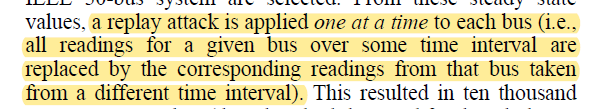

In [7]:
def replay_attack(data, target_index, target_interval):
  """Performs a replay attack by replacing readings with values from a different interval."""

  target_interval = max(0, min(target_interval, len(data)))
  spoofed_data = data.copy()
  spoofed_data[target_index:target_index + target_interval] = data[0:target_interval]
  return spoofed_data

In [8]:
num_spoofed_values = 0
spoofed_data = []
while num_spoofed_values<100000:
  target_index = np.random.randint(0, len(df1))  # Start the attack from
  target_interval =  np.random.randint(1, len(df1))  # Replace  readings
  spoofed_segment = replay_attack(df1, target_index, target_interval)
  spoofed_data.append(spoofed_segment)
  num_spoofed_values += len(spoofed_segment)


print("Original Data:\n", len(df1))
print("\nSpoofed Data:\n", len(spoofed_data))
print(spoofed_data[0][0])
'''
Each list contain 6 features values then for 2861 list has 17,166 feature values.
'''
ds=[]
for x in spoofed_data:
  for y in x:
    ds.append(y)
ds
spoof = pd.DataFrame(ds,columns=['Bus voltages','bus  current','Bus real power','Bus reactive power','Bus voltage angle','Kcl'])
spoof['relay_attack'] = np.where(spoof["Kcl"] > 0, 1, 0)

Original Data:
 30

Spoofed Data:
 2878
[1.06, 0.7223432111579534, -260.9569478352263, 20.41788339794333, 0.0, 0.0041459556523062435]


In [9]:
spoof

,Bus voltages,bus current,Bus real power,Bus reactive power,Bus voltage angle,Kcl,relay_attack
0,1.060000,0.722343,-260.956948,20.417883,0.000000,4.145956e-03,1
1,1.045000,0.362285,-18.300000,-43.369462,-5.378243,1.845428e-04,1
2,1.021178,0.185760,2.400000,1.200000,-7.528660,1.972161e-03,1
3,1.012300,0.352214,7.600000,1.600000,-9.279432,2.120738e-04,1
4,1.010000,0.344921,94.200000,-16.658791,-14.148767,2.680709e-04,1
...,...,...,...,...,...,...,...
100015,0.999946,0.037319,3.500000,2.300000,-16.473981,6.938894e-18,1
100016,1.023539,0.040194,0.000000,0.000000,-15.530080,2.081668e-17,1
100017,1.060000,0.722343,-260.956948,20.417883,0.000000,4.145956e-03,1
100018,1.003706,0.082134,2.400000,0.900000,-16.759313,1.387779e-17,1


### Two dataframe
1. spoof - contains data that is spoofed by replay attack
2. original - contains initial data generation in power simulation

In [10]:
final_dataset = pd.concat([original, spoof], axis=0)
#final_dataset.to_csv("final_dataset.csv", index=False)

## Dependent and Independent variables

In [11]:
final_dataset.head()
y= final_dataset['relay_attack']
X = final_dataset.drop('relay_attack',axis=1)

## SVM

## Splitting Dataset
First split: It divides the original dataset (X and y) into two sets:
1. 80% for training (X_train, y_train)
2. 20% for further splitting (X_test_val, y_test_val)

Second split: It divides the 20% portion (X_test_val, y_test_val) into two equal sets:
1. 50% for testing (X_test, y_test)
2. 50% for validation (X_val, y_val)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


### Model 1:

In [13]:
model1 = svm.SVC(kernel='linear')
model1.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
accuracy1= model1.score(X_test_val, y_test_val)
print("Accuracy:", accuracy1)

Accuracy: 0.8269865067466267


### Model 2:

In [15]:
model2 = svm.SVC(kernel='rbf')
model2.fit(X_train,y_train)

SVC()

In [16]:
accuracy2= model2.score(X_test_val, y_test_val)
print("Accuracy:", accuracy2)

Accuracy: 0.84007996001999


## Neural Network

Tensors

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

In [54]:
X_train_array = X_train.values
X_train_tensor = torch.from_numpy(X_train_array)
X_train_tensor = X_train_tensor.float().to("cuda" if torch.cuda.is_available() else "cpu")

y_train_array = y_train.values
y_train_tensor = torch.from_numpy(y_train_array)
y_train_tensor = y_train_tensor.float().to("cuda" if torch.cuda.is_available() else "cpu")

In [55]:
X_test_val_array = X_test_val.values
X_test_val_tensor = torch.from_numpy(X_test_val_array)
X_test_val_tensor = X_test_val_tensor.float().to("cuda" if torch.cuda.is_available() else "cpu")
y_test_val_array = y_test_val.values
y_test_val_tensor = torch.from_numpy(y_test_val_array)
y_test_val_tensor = y_test_val_tensor.float().to("cuda" if torch.cuda.is_available() else "cpu")

### Network - 1:


In [58]:
class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(6, 150)
        self.hidden2 = nn.Linear(150,60)
        self.output = nn.Linear(60, 31)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = torch.softmax(self.output(x), dim=1)
        return x

model = MyNetwork()
output = model(X_train_tensor)

In [61]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

for epoch in range(1):
    running_loss = 0.0


    for i in range(len(X_train_tensor)):
        inputs = X_train_tensor[i]
        labels = y_train_tensor[i]
        optimizer.zero_grad()
        outputs = model(inputs.unsqueeze(0))
        loss = criterion(outputs, labels.unsqueeze(0).long())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 200 == 199:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,   200] loss: 2.728
[1,   400] loss: 2.748
[1,   600] loss: 2.738
[1,   800] loss: 2.703
[1,  1000] loss: 2.733
[1,  1200] loss: 2.698
[1,  1400] loss: 2.678
[1,  1600] loss: 2.733
[1,  1800] loss: 2.678
[1,  2000] loss: 2.768
[1,  2200] loss: 2.738
[1,  2400] loss: 2.823
[1,  2600] loss: 2.703
[1,  2800] loss: 2.753
[1,  3000] loss: 2.753
[1,  3200] loss: 2.743
[1,  3400] loss: 2.688
[1,  3600] loss: 2.693
[1,  3800] loss: 2.738
[1,  4000] loss: 2.713
[1,  4200] loss: 2.713
[1,  4400] loss: 2.673
[1,  4600] loss: 2.738
[1,  4800] loss: 2.768
[1,  5000] loss: 2.743
[1,  5200] loss: 2.703
[1,  5400] loss: 2.738
[1,  5600] loss: 2.768
[1,  5800] loss: 2.793
[1,  6000] loss: 2.703
[1,  6200] loss: 2.688
[1,  6400] loss: 2.713
[1,  6600] loss: 2.738
[1,  6800] loss: 2.753
[1,  7000] loss: 2.753
[1,  7200] loss: 2.723
[1,  7400] loss: 2.758
[1,  7600] loss: 2.733
[1,  7800] loss: 2.738
[1,  8000] loss: 2.743
[1,  8200] loss: 2.703
[1,  8400] loss: 2.783
[1,  8600] loss: 2.773
[1,  8800] 

In [63]:
correct = 0
total = 0

with torch.no_grad():
    for i in range(len(X_test_val_tensor)):
        inputs = X_test_val_tensor[i]
        labels = y_test_val_tensor[i]
        outputs = model(inputs.unsqueeze(0))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.unsqueeze(0).size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the  test dataset : {100 * correct // total} %')

Accuracy of the network on the  test dataset : 75 %
